<font size=8><b><center> Analiza Rynku Muzycznego Spotify

# Wstęp
Celem niniejszej analizy jest zbadanie charakterystycznych atrybutów utworów znajdujących się w listach przebojów Spotify oraz preferencji konsumentów. Badanie obejmuje lata 2020-2021. Całość analizy zaprezentowana jest w dokumencie PDF.

# Importowanie bibliotek oraz pakietów

In [142]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from sklearn import cluster
from sklearn.preprocessing import StandardScaler
import statistics
import warnings
warnings.filterwarnings("ignore")
import statsmodels.formula.api as smf
from statsmodels.stats.multicomp import pairwise_tukeyhsd
import scipy.stats as stats

# Przygotowanie danych
Baza danych **Spotify_2020_2021** zawiera utwory, które w latach 2020-2021 przynajmniej raz
wystąpiły w zestawieniu „Top 200 Weekly (Global)” tworzonym przez platformę Spotify.
Powyższe zestawienie aktualizowane jest co tydzień i zawiera najczęściej odtwarzane utwory
na Spotify w danym tygodniu. Baza danych została oczyszczona z duplikatów i braków
danych, w wyniku czego pozostało 1543 obserwacji. Za obserwacje uznaje się utwór
muzyczny.

In [143]:
df4 = pd.read_csv("bazy_danych\spotify_2020_2021.csv")

te pozycje mają braki danych - usuwam je

In [144]:
df4.loc[df4['Valence'] == ' ']

,Index,Highest Charting Position,Number of Times Charted,Week of Highest Charting,Song Name,Streams,Artist,Artist Followers,Song ID,Genre,...,Danceability,Energy,Loudness,Speechiness,Acousticness,Liveness,Tempo,Duration (ms),Valence,Chord
35,36,36,1,2021-07-23--2021-07-30,NOT SOBER (feat. Polo G & Stunna Gambino),"11,869,336",The Kid LAROI,,,,...,,,,,,,,,,
163,164,5,39,2020-10-30--2020-11-06,34+35,"5,453,159",Ariana Grande,,,,...,,,,,,,,,,
464,465,118,1,2021-03-26--2021-04-02,Richer (feat. Polo G),"6,292,362",Rod Wave,,,,...,,,,,,,,,,
530,531,20,5,2021-01-15--2021-01-22,"34+35 Remix (feat. Doja Cat, Megan Thee Stalli...","6,162,453",Ariana Grande,,,,...,,,,,,,,,,
636,637,22,6,2020-12-18--2020-12-25,Driving Home for Christmas - 2019 Remaster,"8,804,531",Chris Rea,,,,...,,,,,,,,,,
654,655,73,1,2020-12-18--2020-12-25,Thank God It's Christmas - Non-Album Single,"10,509,961",Queen,,,,...,,,,,,,,,,
750,751,19,20,2020-07-31--2020-08-07,"Agua (with J Balvin) - Music From ""Sponge On T...","5,358,940",Tainy,,,,...,,,,,,,,,,
784,785,76,14,2020-09-04--2020-09-11,"Lean (feat. Towy, Osquel, Beltito & Sammy & Fa...","4,739,241","Super Yei, Jone Quest",,,,...,,,,,,,,,,
876,877,164,4,2020-09-18--2020-09-25,+Linda,"4,964,708",Dalex,,,,...,,,,,,,,,,
1140,1141,131,1,2020-05-29--2020-06-05,In meinem Benz,"5,494,500","AK AUSSERKONTROLLE, Bonez MC",,,,...,,,,,,,,,,


In [145]:
df4 = df4.drop([163, 464, 530, 636, 654, 750, 784, 876, 1140, 36, 1539, 35, 1538])

In [146]:
df4.dtypes

Index                         int64
Highest Charting Position     int64
Number of Times Charted       int64
Week of Highest Charting     object
Song Name                    object
Streams                      object
Artist                       object
Artist Followers             object
Song ID                      object
Genre                        object
Release Date                 object
Weeks Charted                object
Popularity                   object
Danceability                 object
Energy                       object
Loudness                     object
Speechiness                  object
Acousticness                 object
Liveness                     object
Tempo                        object
Duration (ms)                object
Valence                      object
Chord                        object
dtype: object

zamieniam na wartości liczbowe

In [147]:
df4[['Artist Followers','Popularity',
 'Danceability',
 'Energy',
 'Loudness',
 'Speechiness',
 'Acousticness',
 'Liveness',
 'Tempo',
 'Duration (ms)',
 'Valence']] = df4[['Artist Followers','Popularity',
 'Danceability',
 'Energy',
 'Loudness',
 'Speechiness',
 'Acousticness',
 'Liveness',
 'Tempo',
 'Duration (ms)',
 'Valence']].apply(pd.to_numeric)

In [148]:
df4.shape

(1543, 23)

In [149]:
# finalna baza danych służąca do analizy posiada 1543 obserwacje. Za obserwacje uznaje się utwór muzyczny.
# df4.to_csv(r'bazy_danych\Spotify_obrobione.csv', index=False, header=True)

# Klastrowanie
Przeprowadzamy klastrowanie K-średnich przy wykorzystaniu dystansu euklidesowego, aby zidentyfikować grupy utworów o podobnych cechach. 1. Baza danych Spotify 2020-2021 (już obrobiona) 

In [150]:
df = pd.read_csv("bazy_danych\Spotify_obrobione.csv")

In [151]:
df.drop("Chord", axis=1)
df.head(1)

,Index,Highest Charting Position,Number of Times Charted,Week of Highest Charting,Song Name,Streams,Artist,Artist Followers,Song ID,Genre,...,Danceability,Energy,Loudness,Speechiness,Acousticness,Liveness,Tempo,Duration (ms),Valence,Chord
0,1,1,8,2021-07-23--2021-07-30,Beggin',"48,633,449",Måneskin,3377762,3Wrjm47oTz2sjIgck11l5e,"['indie rock italiano', 'italian pop']",...,0.714,0.8,-4.808,0.0504,0.127,0.359,134.002,211560,0.589,B


In [152]:
df.dtypes #ponieważ Streams pojawia się jako object to chce z niego zrobić integer

Index                          int64
Highest Charting Position      int64
Number of Times Charted        int64
Week of Highest Charting      object
Song Name                     object
Streams                       object
Artist                        object
Artist Followers               int64
Song ID                       object
Genre                         object
Release Date                  object
Weeks Charted                 object
Popularity                     int64
Danceability                 float64
Energy                       float64
Loudness                     float64
Speechiness                  float64
Acousticness                 float64
Liveness                     float64
Tempo                        float64
Duration (ms)                  int64
Valence                      float64
Chord                         object
dtype: object

In [153]:
df['Streams'] = df['Streams'].str.replace(',', '').astype(int)

In [154]:
df.dtypes

Index                          int64
Highest Charting Position      int64
Number of Times Charted        int64
Week of Highest Charting      object
Song Name                     object
Streams                        int32
Artist                        object
Artist Followers               int64
Song ID                       object
Genre                         object
Release Date                  object
Weeks Charted                 object
Popularity                     int64
Danceability                 float64
Energy                       float64
Loudness                     float64
Speechiness                  float64
Acousticness                 float64
Liveness                     float64
Tempo                        float64
Duration (ms)                  int64
Valence                      float64
Chord                         object
dtype: object

## Standaryzacja zmiennych
Standaryzujemy zmienne, aby ujednolicić ich skalę i przygotować dane do klastrowania.

In [155]:
scaler = StandardScaler()

In [156]:
#nowa baza danych ze standaryzowanymi zmiennymi

In [157]:
df_clustering = pd.DataFrame()

In [158]:
df_clustering[['Danceability_T', 'Energy_T', 'Loudness_T', 'Speechiness_T', 'Acousticness_T',
       'Liveness_T', 'Tempo_T', 'Duration (ms)_T', 'Valence_T']] = scaler.fit_transform(df[['Danceability', 'Energy', 'Loudness', 'Speechiness', 'Acousticness',
       'Liveness', 'Tempo', 'Duration (ms)', 'Valence']])

In [159]:
df_clustering.head()

,Danceability_T,Energy_T,Loudness_T,Speechiness_T,Acousticness_T,Liveness_T,Tempo_T,Duration (ms)_T,Valence_T
0,0.170245,1.030593,0.613556,-0.662755,-0.486337,1.233571,0.377512,0.287873,0.327050
1,-0.693978,0.807792,0.344240,-0.681782,-0.840699,-0.542835,1.591997,-1.191669,-0.161183
2,-0.890712,0.188900,0.519535,0.275897,0.344636,-0.668432,1.490581,-0.420845,0.762501
3,0.830709,1.630918,1.050200,-0.804097,-0.806342,1.268266,0.107882,0.701082,0.335847
4,0.324822,0.436457,-0.422675,-0.562186,-0.912611,-0.909912,0.918158,0.297206,1.668592


In [160]:
df_clustering.shape

(1543, 9)

## Wybór ilości klastrów

### Wykres łokcia

In [161]:
# Źródło: https://medium.com/analytics-vidhya/how-to-determine-the-optimal-k-for-k-means-708505d204eb

# function returns WSS score for k values from 1 to kmax
def calculate_WSS(points, kmax):
    sse = []
    for k in range(1, kmax+1):
        kmeans = cluster.KMeans(n_clusters = k).fit(points)
        centroids = kmeans.cluster_centers_
        pred_clusters = kmeans.predict(points)
        curr_sse = 0

        # Policzenie WSS metryką euklidesową:
        for i in range(len(points)):
            curr_center = centroids[pred_clusters[i]]
            curr_sse += (points.iloc[i, 0] - curr_center[0]) ** 2 + (points.iloc[i, 1] - curr_center[1]) ** 2
      
        sse.append(curr_sse)
    return sse

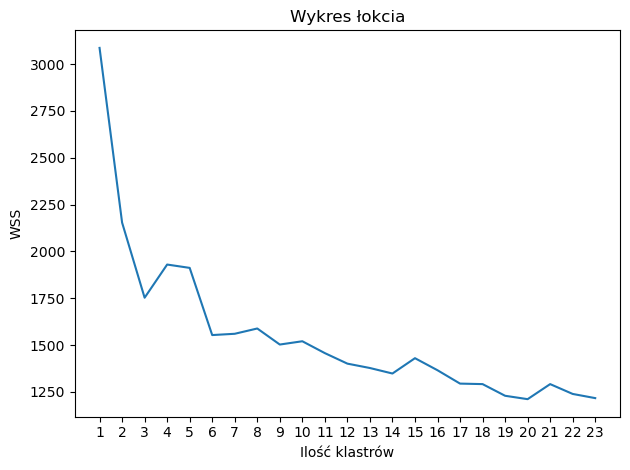

In [162]:
wss = calculate_WSS(df_clustering[['Danceability_T', 'Energy_T', 'Loudness_T', 'Speechiness_T', 'Acousticness_T',
       'Liveness_T', 'Tempo_T', 'Duration (ms)_T', 'Valence_T']], 23)
plt.plot(list(range(1,24)), wss)
plt.title('Wykres łokcia')
plt.xlabel('Ilość klastrów')
plt.ylabel("WSS")
plt.xticks(list(range(1,24)))
plt.tight_layout()
#plt.savefig('elbow_plot_bachelor.png')
plt.show()

wniosek: **5/6 klastrów** 

### Współczynnik Silhouette

In [163]:
from sklearn.metrics import silhouette_score
for k in range(2,10):
    clus = cluster.KMeans(n_clusters=k)
    df_clustering["KMean"] = clus.fit_predict(df_clustering[['Danceability_T', 'Energy_T', 'Loudness_T', 'Speechiness_T', 'Acousticness_T',
       'Liveness_T', 'Tempo_T', 'Duration (ms)_T', 'Valence_T']])
    print("Silhouette Coefficient")
    print(k, round(silhouette_score(df_clustering[['Danceability_T', 'Energy_T', 'Loudness_T', 'Speechiness_T', 'Acousticness_T',
       'Liveness_T', 'Tempo_T', 'Duration (ms)_T', 'Valence_T']],  df_clustering["KMean"]),4))

Silhouette Coefficient
2 0.2503
Silhouette Coefficient
3 0.1551
Silhouette Coefficient
4 0.1335
Silhouette Coefficient
5 0.1377
Silhouette Coefficient
6 0.1294
Silhouette Coefficient
7 0.1256
Silhouette Coefficient
8 0.123
Silhouette Coefficient
9 0.1213


wniosek: **5 klastrów** 

<font size = 4><b> Finalny wniosek: </font> <br>
Wykres łokcia wskazuje, że optymalna ilość klastrów dla tego zbioru danych równa jest 6, z
ewentualnym rozważeniem zastosowania ilości 5 klastrów. Biorąc również pod
uwagę wartości współczynnika Silhouette stwierdzono, iż najbardziej efektywnym
rozwiązaniem będzie zastosowanie podziału na **5 klastrów**, ze względu na relatywnie duży
spadek wartości wspomnianego współczynnika podczas przejścia z ilości 5 do ilości 6
klastrów.

## Klastrowanie

In [164]:
clus = cluster.KMeans(n_clusters=5, random_state = 42)
df["KMean_group"] = clus.fit_predict(df_clustering[['Danceability_T', 'Energy_T', 'Loudness_T', 'Speechiness_T', 'Acousticness_T',
       'Liveness_T', 'Tempo_T', 'Duration (ms)_T', 'Valence_T']])

## Analiza klastrów

### Analiza cech utworu w klastrach

In [165]:
columns_to_display = ['Popularity', 'Danceability', 'Energy', 'Loudness', 'Speechiness',
       'Acousticness', 'Liveness', 'Tempo', 'Duration (ms)', 'Valence', 'KMean_group']

In [166]:
df[columns_to_display].groupby('KMean_group').mean(numeric_only=True).style.background_gradient()

,Popularity,Danceability,Energy,Loudness,Speechiness,Acousticness,Liveness,Tempo,Duration (ms),Valence
KMean_group,,,,,,,,,,
0,71.597122,0.636679,0.623115,-6.352115,0.072055,0.176884,0.150363,123.793789,204487.556355,0.330218
1,71.122873,0.747095,0.729822,-5.007342,0.083738,0.181886,0.158536,120.945440,197397.000000,0.706949
2,69.032362,0.771945,0.616472,-6.479883,0.289487,0.167628,0.153305,129.727191,187577.715210,0.522651
3,65.764103,0.546928,0.377333,-10.106944,0.064101,0.726759,0.147536,115.457503,199438.666667,0.377955
4,69.827957,0.628226,0.725495,-5.636624,0.154198,0.218322,0.612129,121.848516,203754.462366,0.507742


In [167]:
df[columns_to_display].mean(numeric_only=True)

Popularity           70.077122
Danceability          0.689770
Energy                0.633478
Loudness             -6.348062
Speechiness           0.123549
Acousticness          0.248735
Liveness              0.181229
Tempo               122.834721
Duration (ms)    197988.038237
Valence               0.514645
KMean_group           1.363577
dtype: float64

<font size=4> <b> Empiryczne charakterystyki klastrów: </font><br>
Każdemu z klastrów nadano jego empiryczną charakterystykę w oparciu o średnie
wartości cech utworów w całej populacji oraz w podziale na poszczególne
klastry. Klaster „0” posiada najniższą średnią wartość parametru Valence (0,33)
oraz relatywnie niską średnią wartość dla parametru Danceability (0,64). Podczas, gdy
średnia wartość parametru Valence dla całej populacji wynosi 0,51, natomiast w przypadku
parametru Danceability wynosi ona 0,69. W konsekwencji, **klaster „0” określony został jako
zbiór melancholijnych utworów muzycznych, wyraźnie wyrażających smutek oraz
nienadających się do tańczenia**. Zaś klaster „1” charakteryzuje się najwyższą średnią
wartością zmiennej Valence (0,71) oraz Energy (0,73) spośród wszystkich klastrów. Ponadto,
wykazuje on relatywnie wysoką wartość zmiennej Danceability (0,75) w porównaniu do
wcześniej wymienionej wartości średniej zmiennej Danceability dla całej populacji. W
wyniku tego stwierdzono, iż **klaster „1” charakteryzuje się wyjątkową energicznością i
pozytywnym nacechowaniem**, stanowiąc swoisty kontrapunkt w kontekście taneczności do
innych klastrów z pominięciem klastra „2”. Klaster 2 wyróżnia się najwyższym średnim
poziomem zmiennej Danceability (0,77) na tle pozostałych klastrów. Co więcej, posiada on
również najwyższą średnią wartość zmiennej Tempo (129,73) oraz Speechiness (0,29).
Wszystkie wspomniane wartości w sposób znaczący przewyższają średnie wartości cech
utworów dla całej populacji. W efekcie sformułowano wniosek, że **klaster „2” wyróżnia się
nadzwyczajną tanecznością oraz obfitością tekstów i wypowiedzi werbalnych, manifestując
prędkość i intensywność charakterystyczną dla gatunku muzycznego, jakim jest rap oraz hiphop**. W dalszej kolejności ustalono, że klaster „3” posiada najniższe średnie wartości wśród
wszystkich klastrów dla zmiennych Danceability (0,55), Energy (0,38), Speechiness (0,06)
oraz Tempo (115,46). Wszystkie te wartości w sposób znaczny różnią się od średnich
wartości parametrów wyznaczanych dla całej próbki. Dodatkowo, klaster ten cechuje się
relatywnie niską średnią wartością parametru Valence (0,38). Na tej podstawie uznano, że
**klaster „3” zawiera w sobie utwory określane jako akustyczne. Jednocześnie,
charakteryzujące się on relatywnie smutnym tonem, przejawiającym się w niskim tempie oraz
braku energetyzującego aspektu, co skutkuje nietanecznym i nieenergicznym charakterem
utworów**. Wreszcie klaster „4”, który posiada najwyższą spośród wszystkich klastrów średnią
wartość zmiennej Energy (0,73) oraz Liveness (0,61). Warto nadmienić, iż w tym przypadku,
wartość dla zmiennej Liveness jest rekordowo wysoka na tle średnich wartości tej zmiennej w
pozostałych klastrach (oscylują one wokół wartości 0,15). Finalnie stwierdzono, że **klaster
„4” posiada wyjątkowo energiczny charakter, który jednak nie wiąże się z tanecznością, lecz
jest wynikiem znaczącego uczestnictwa publiczności, co sugeruje występowanie zapisów
koncertowych w tym klastrze**.


In [168]:
df['KMean_group'].value_counts()

KMean_group
1    529
0    417
2    309
3    195
4     93
Name: count, dtype: int64

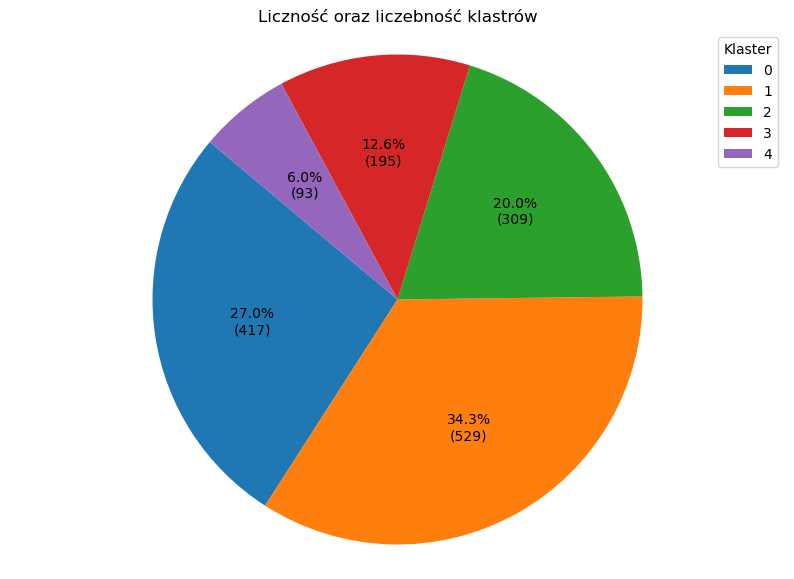

In [169]:
# tworzenie wykresu kołowego liczebności oraz liczności klastrów
new_categories_order = ['0', '1', '2', '3', '4']
new_observations_order = [417, 529, 309, 195, 93]  

plt.figure(figsize=(10, 7), facecolor='white')

def my_autopct(pct):
    total = sum(new_observations_order)
    count = int(round(pct/100*total))
    return '{:.1f}%\n({:,.0f})'.format(pct, count)

plt.pie(new_observations_order, autopct=my_autopct, startangle=140)
plt.legend(new_categories_order, title='Klaster')
plt.title('Liczność oraz liczebność klastrów')
plt.axis('equal')  
plt.show()


Powyższa wizualizacja jednoznacznie wskazuje na znaczące
różnicę w liczebnościach klastrów. Klastry „0” oraz „1” są grupami najliczniejszym i łącznie
stanowią ponad połowę liczebności całej populacji. Podczas gdy najmniej liczny klaster „4”
posiada relatywnie niską liczność wynoszącą zaledwie 6%.

### Boxploty wg. klastrów patrząc na zmienną Streams

In [170]:
df.groupby('KMean_group')['Streams'].mean() #średnie wartości Stream dla każdego klastra

KMean_group
0    6.296146e+06
1    6.506471e+06
2    5.856432e+06
3    6.670360e+06
4    6.415982e+06
Name: Streams, dtype: float64

In [171]:
df.groupby('KMean_group')['Streams'].median()

KMean_group
0    5298893.0
1    5211351.0
2    5241227.0
3    5446609.0
4    5594561.0
Name: Streams, dtype: float64

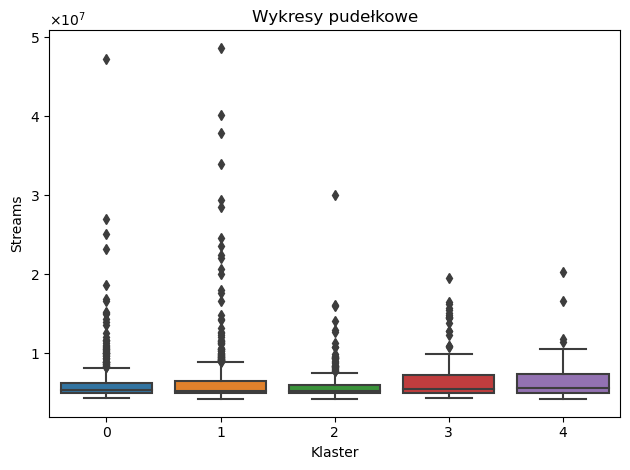

In [172]:
sns.boxplot(x = 'KMean_group', y = 'Streams', data = df)
plt.ticklabel_format(style='scientific', axis='y', scilimits=(0,0), useMathText=True)
plt.title('Wykresy pudełkowe')
plt.xlabel('Klaster')
plt.tight_layout()
#plt.savefig('Boxplocik')
plt.show()

ile jest obserwacji odstających w całym klastrze?

In [173]:
klaster_0 = df.query('KMean_group == 0')
klaster_1 = df.query('KMean_group == 1')
klaster_2 = df.query('KMean_group == 2')
klaster_3 = df.query('KMean_group == 3')
klaster_4 = df.query('KMean_group == 4')

In [174]:
len(klaster_0)

417

In [175]:
numer_klastra=0
for x in [klaster_0, klaster_1,klaster_2,klaster_3,klaster_4]:
    Q1 = x['Streams'].quantile(0.25)
    Q3 = x['Streams'].quantile(0.75)
    IQR = Q3 - Q1
    # Definicja granic odstępowych (wąsów)
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    # Zliczenie obserwacji odstających w kolumnie 'Streams'
    outliers = ((x['Streams'] < lower_bound) | (x['Streams'] > upper_bound)).sum()
    procent = (outliers/len(x)) * 100
    print(f"Liczba obserwacji odstających w klastrze {numer_klastra}: {outliers}. Czyli {int(procent)}% całkowitej populacji tego klastra. ")
    numer_klastra+=1

Liczba obserwacji odstających w klastrze 0: 52. Czyli 12% całkowitej populacji tego klastra. 
Liczba obserwacji odstających w klastrze 1: 61. Czyli 11% całkowitej populacji tego klastra. 
Liczba obserwacji odstających w klastrze 2: 31. Czyli 10% całkowitej populacji tego klastra. 
Liczba obserwacji odstających w klastrze 3: 18. Czyli 9% całkowitej populacji tego klastra. 
Liczba obserwacji odstających w klastrze 4: 4. Czyli 4% całkowitej populacji tego klastra. 


**Wnioski:**<br>
Wykresy pudełkowe wskazują na dużą liczbę
obserwacji odstających w niemal każdym klastrze. Jednakże, w wyniku dalszej analizy
wykazano, iż maksymalny udział obserwacji odstających w klastrze wynosi około 12%.
Ostatecznie **nie zdecydowano się na usunięcie, bądź przekształcenie obserwacji odstających**.
Ponadto, na podstawie wspomnianego wykresu stwierdzono występowanie **prawostronnej
asymetrii rozkładu we wszystkich klastrach**, co jest zgodne z logiką badania, ponieważ baza
danych zawiera jedyne utwory najczęściej odtwarzane – istnieje pewien dolny próg odcięcia,
ponieważ w próbie nie występują utwory z relatywnie małą liczbą odtworzeń. Co więcej,
klastry są zróżnicowane pod względem wielkości rozstępu międzykwartylowego –
największy rozstęp międzykwartylowy występuje w klastrach „4” oraz „3”, natomiast
najmniejszy w klastrze „2”. Dodatkowo, **wartości median w klastrach oscylują wokół
niemalże tej samej wartości**. Zatem stwierdzono zasadność weryfikacji hipotezy o równości
średnich we wszystkich podpróbach (klastrach).

### współczynnik Giniego

In [176]:
#Wskaźnik ten osiągnąłby wartość 0 (rozkład jednorodny), gdyby wszystkie osoby miały ten sam dochód, 
#natomiast wartość 1, gdyby wszystkie osoby poza jedną miały dochód zerowy. 
#Zatem, im wyższa jest wartość wskaźnika, tym większy jest stopień koncentracji dochodów i większe jest ich zróżnicowanie.


#Analogicznie w tym przypadku np. dla zmiennej Danceability
#Wskaźnik osiąga wartość 0, gdy wszystkie utwory mają ten sam poziom Danceability
#natomiast wartość 1, gdy wszystkie utwory poza jednym miały Danceability równe 0

In [177]:
# funkcja do wyliczania współczynnika Giniego
def gini(x):
    total = 0
    for i, xi in enumerate(x[:-1], 1):
        total += np.sum(np.abs(xi - x[i:]))
    return total / (len(x)**2 * np.mean(x))

In [178]:
variables = ['Streams', 'Danceability', 'Energy', 'Loudness', 'Speechiness',
       'Acousticness', 'Liveness', 'Tempo', 'Duration (ms)', 'Valence']
l=0
for i in [klaster_0, klaster_1, klaster_2, klaster_3, klaster_4]:
    print(f"KLASTER {l}:")
    l +=1
    ginis = []
    for j in variables:
        array_to_gini = np.array(i[j])
        ginis.append(gini(array_to_gini))
        print(f"wsp gini dla zmiennej {j}: {round(gini(array_to_gini),2)}")
        
    print(f"średni wsp gini dla klastra wynosi {round(np.mean(ginis),2)}")

KLASTER 0:
wsp gini dla zmiennej Streams: 0.0
wsp gini dla zmiennej Danceability: 0.11
wsp gini dla zmiennej Energy: 0.11
wsp gini dla zmiennej Loudness: -0.14
wsp gini dla zmiennej Speechiness: 0.31
wsp gini dla zmiennej Acousticness: 0.51
wsp gini dla zmiennej Liveness: 0.26
wsp gini dla zmiennej Tempo: 0.14
wsp gini dla zmiennej Duration (ms): 0.11
wsp gini dla zmiennej Valence: 0.24
średni wsp gini dla klastra wynosi 0.17
KLASTER 1:
wsp gini dla zmiennej Streams: 0.0
wsp gini dla zmiennej Danceability: 0.07
wsp gini dla zmiennej Energy: 0.09
wsp gini dla zmiennej Loudness: -0.18
wsp gini dla zmiennej Speechiness: 0.32
wsp gini dla zmiennej Acousticness: 0.52
wsp gini dla zmiennej Liveness: 0.32
wsp gini dla zmiennej Tempo: 0.13
wsp gini dla zmiennej Duration (ms): 0.11
wsp gini dla zmiennej Valence: 0.11
średni wsp gini dla klastra wynosi 0.15
KLASTER 2:
wsp gini dla zmiennej Streams: -0.0
wsp gini dla zmiennej Danceability: 0.09
wsp gini dla zmiennej Energy: 0.1
wsp gini dla zmien

In [179]:
#im niższy wsp giniego tym bardziej klastry są homogeniczne a zatem lepiej wyseparowane
#mniej zmiennych które mają skrajne wartości

WNIOSKI:

średnie współczyniki giniego dla klastrów są ok

rzeczywiście dobry podział na liczbę odtworzeń (niskie wsp giniego dla Streams)

z punktu widzenia późniejszej procedury Manna Whitneya interesują nas tylko tamte wyniki

# Analiza playlist użytkowników

In [180]:
df_all = df.copy()
df_0 = df.query('KMean_group == 0' )
df_1 = df.query('KMean_group == 1' )
df_2 = df.query('KMean_group == 2' )
df_3 = df.query('KMean_group == 3' )
df_4 = df.query('KMean_group == 4' )

In [181]:
playlists = pd.read_csv('bazy_danych/spotify_users_playlists.csv', on_bad_lines='skip')

In [182]:
playlists.shape

(12891680, 4)

In [183]:
playlists.head()

,user_id,"""artistname""","""trackname""","""playlistname"""
0,9cc0cfd4d7d7885102480dd99e7a90d6,Elvis Costello,(The Angels Wanna Wear My) Red Shoes,HARD ROCK 2010
1,9cc0cfd4d7d7885102480dd99e7a90d6,Elvis Costello & The Attractions,"(What's So Funny 'Bout) Peace, Love And Unders...",HARD ROCK 2010
2,9cc0cfd4d7d7885102480dd99e7a90d6,Tiffany Page,7 Years Too Late,HARD ROCK 2010
3,9cc0cfd4d7d7885102480dd99e7a90d6,Elvis Costello & The Attractions,Accidents Will Happen,HARD ROCK 2010
4,9cc0cfd4d7d7885102480dd99e7a90d6,Elvis Costello,Alison,HARD ROCK 2010


In [184]:
playlists = playlists.rename(columns=lambda x: x.replace('"', ""))

## usunięcie duplikatów
czyli utwory które występują więcej niż raz w danej playliście oraz usunięcie braków danych

In [185]:
playlists.columns

Index(['user_id', ' artistname', ' trackname', ' playlistname'], dtype='object')

In [186]:
playlists = playlists.drop_duplicates(subset=[' artistname', ' trackname', ' playlistname'])

In [187]:
playlists = playlists.dropna()

In [188]:
playlists.shape

(11013847, 4)

## Jakie playlisty dominują w klastrze 0?

In [189]:
razem = df_0.merge(playlists, left_on=['Song Name', 'Artist'], right_on=[' trackname', ' artistname'])

In [190]:
razem.shape

(12186, 28)

In [191]:
razem[' playlistname'].value_counts().sort_values(ascending=False).head(15)

 playlistname
Starred                  19
Liked from Radio         18
Chill                    13
Favoritas de la radio    12
Random                   11
nice                     11
My Shazam Tracks         10
Rock                     10
Curtida no Rádio         10
2013                     10
Pop                      10
Workout                  10
Várias                    9
Mix                       9
Indie                     9
Name: count, dtype: int64

In [192]:
#duża uwaga na Radio, Shazam
#Workout, Rock, Chill

## Jakie playlisty dominują w klastrze 1?

In [193]:
razem_1 = df_1.merge(playlists, left_on=['Song Name', 'Artist'], right_on=[' trackname', ' artistname'])

In [194]:
razem_1.shape

(8434, 28)

In [195]:
razem_1[' playlistname'].value_counts().sort_values(ascending=False).head(15)

 playlistname
Starred                  22
Liked from Radio         17
Christmas                11
Party                    11
Favoritas de la radio     9
christmas                 9
Music                     9
Oldies                    8
Work                      8
Running                   8
Jul                       8
Albums                    8
Random                    8
workout                   8
Workout                   7
Name: count, dtype: int64

In [196]:
#znowu radio, christmas, workout, impreza

## Jakie playlisty dominują w klastrze 2?

In [197]:
razem_2 = df_2.merge(playlists, left_on=['Song Name', 'Artist'], right_on=[' trackname', ' artistname'])

In [198]:
razem_2.shape

(266, 28)

In [199]:
razem_2[' playlistname'].value_counts().sort_values(ascending=False).head(15)

 playlistname
Rap                                        2
Starred                                    2
Hip-Hop                                    2
Running                                    2
NYTU                                       1
I listen to this and you can't stop me     1
J. Cole - 2014 Forest Hills Drive          1
Pre-Game Vibe                              1
winter 2014 vibez                          1
J. Cole — 2014 Forest Hills Drive          1
J. Cole – 2014 Forest Hills Drive          1
59% Win Ratio                              1
vIb3z                                      1
POP POSADA                                 1
New School                                 1
Name: count, dtype: int64

In [200]:
#potwierdzenie że raczej rap/hipohp

## Jakie playlisty dominują w klastrze 3?

In [201]:
razem_3 = df_3.merge(playlists, left_on=['Song Name', 'Artist'], right_on=[' trackname', ' artistname'])

In [202]:
razem_3.shape

(5917, 28)

In [203]:
razem_3[' playlistname'].value_counts().sort_values(ascending=False).head(15)

 playlistname
Starred                  21
Liked from Radio         16
Christmas                15
xmas                     11
Xmas                     11
Jul                      10
Christmas!                9
Christmas Playlist        9
Chill                     9
Favoritas de la radio     9
Christmas 2014            9
Christmas Party           8
Christmas 2013            8
christmas                 8
Merry Christmas Y'all     7
Name: count, dtype: int64

In [204]:
#mega świątecznie - dziwne bo wg średniej Valence są to utwory relatywnie mało pozytywne i nieenergiczne
#znowu radio

## Jakie playlisty dominują w klastrze 4?

In [205]:
razem_4 = df_4.merge(playlists, left_on=['Song Name', 'Artist'], right_on=[' trackname', ' artistname'])

In [206]:
razem_4.shape

(2454, 28)

In [207]:
razem_4[' playlistname'].value_counts().sort_values(ascending=False).head(15)

 playlistname
Starred                    6
Liked from Radio           5
Mix                        4
Rock                       4
Old Music (Before 2010)    3
Music                      3
Ultimate Safe For Work!    3
Favoritas                  3
Favoritas de la radio      3
Wedding                    3
Everything at once         3
☁☼☁                        3
rock                       3
Oldies                     3
2010                       3
Name: count, dtype: int64

In [208]:
#znowu radio
#Rock
#duży mix

**Wnioski:** <br>
**Uzyskano potwierdzenie wniosków wysnutych w rozdziale "Klastrowanie K-średnich"**. Najliczniejszy klaster „0” w rzeczywistości zawiera tytuły playlist wskazujące na
jego melancholijnyy charakter (Chill, Nice, Indie). Natomiast utwory muzyczne z klastra „1”
często zawierają się w playlistach przeznaczonych do uprawiania sportu, aktywności
fizycznej czy zabawy (Party, Running, Workout, Christmas), co dodatkowo poświadcza o
wysokiej taneczności oraz energiczności utworów znajdujących się w tym klastrze. Niniejsza
analiza upewniła również o wcześniejszym przypuszczeniu jakoby klaster „2” zawierał
utwory z gatunku hip-hop lub rap. Biorąc pod rozważania klaster „3” potwierdzono jego
melancholijny, mało energiczny oraz spokojny ton, który również cechuje playlisty utworów
świątecznych (Christmas, Xmas, Xmas, Christmas !). Klaster „4” okazał się być bardzo
zróżnicowany pod względem tytułów playlist, zatem niniejsza analiza nie pozwoliła na
jednoznaczne potwierdzenie empirycznego charakteru tego klastra. Co więcej, jednym z
najbardziej interesujących aspektów analizy jest zaobserwowane zjawisko częstego
występowania playlist zatytułowanych w sposób sugerujący iż są one zbiorem utworów, które
zostały wcześniej odkryte i usłyszane na innych platformach, takich jak radio czy serwis
Shazam. Ten fakt może wskazywać na nie tylko istnienie zaobserwowanego przez grupę Vox
(2022) zjawiska „TikTok-to-Spotify pipeline”, ale także potencjalnych, analogicznie
działających zjawisk, które określić można jako „Radio-to-Spotify pipeline” czy też „Shazamto-Spotify pipeline”. Wskazane jest zatem dalsze badanie tego zjawiska w celu pełniejszego
zrozumienia. W związku z tym, w dokumencie PDF znaleźć można
szczegółową analizę zjawiska „TikTok-to-Spotify pipeline”, w celu weryfikacji jego
rzeczywistego istnienia.


# Klastrowanie - ujęcie makro

## ANOVA i Kruskal-Wallis

TEST ANOVA, czy średnie charakterystyki utworów w każdym klastrze są takie same?

In [209]:
df_all['KMean_group'].value_counts()

KMean_group
1    529
0    417
2    309
3    195
4     93
Name: count, dtype: int64

In [210]:
# analiza wariancji ANOVA
# H0: średnie we wszystkich populacjach są równe
# założenia testu ANOVA: 
# zmienna objaśniana w podgrupach ma rozkład normalny oraz wariancje w podgrupach są równe (homogeniczność wariancji)

In [211]:
#za pomocą testów
for y in ['Danceability','Energy','Loudness','Speechiness','Acousticness','Liveness','Tempo','Duration (ms)','Valence']:
    for x, cluster in enumerate([df_0[y], df_1[y], df_2[y], df_3[y], df_4[y]]):
        print(f"Test Jarque-Bera zmiennej {y} dla klastra {x}: {stats.jarque_bera(cluster)[1].round(3)}")


Test Jarque-Bera zmiennej Danceability dla klastra 0: 0.005
Test Jarque-Bera zmiennej Danceability dla klastra 1: 0.002
Test Jarque-Bera zmiennej Danceability dla klastra 2: 0.0
Test Jarque-Bera zmiennej Danceability dla klastra 3: 0.588
Test Jarque-Bera zmiennej Danceability dla klastra 4: 0.007
Test Jarque-Bera zmiennej Energy dla klastra 0: 0.123
Test Jarque-Bera zmiennej Energy dla klastra 1: 0.0
Test Jarque-Bera zmiennej Energy dla klastra 2: 0.712
Test Jarque-Bera zmiennej Energy dla klastra 3: 0.517
Test Jarque-Bera zmiennej Energy dla klastra 4: 0.081
Test Jarque-Bera zmiennej Loudness dla klastra 0: 0.02
Test Jarque-Bera zmiennej Loudness dla klastra 1: 0.0
Test Jarque-Bera zmiennej Loudness dla klastra 2: 0.001
Test Jarque-Bera zmiennej Loudness dla klastra 3: 0.0
Test Jarque-Bera zmiennej Loudness dla klastra 4: 0.0
Test Jarque-Bera zmiennej Speechiness dla klastra 0: 0.0
Test Jarque-Bera zmiennej Speechiness dla klastra 1: 0.0
Test Jarque-Bera zmiennej Speechiness dla klast

In [212]:
for y in ['Danceability','Energy','Loudness','Speechiness','Acousticness','Liveness','Tempo','Duration (ms)','Valence']:
    print(f"P-value w teśćie Barletta zmiennej {y}:{stats.bartlett(df_0[y], df_1[y], df_2[y], df_3[y], df_4[y])[1].round(3)}")

P-value w teśćie Barletta zmiennej Danceability:0.0
P-value w teśćie Barletta zmiennej Energy:0.062
P-value w teśćie Barletta zmiennej Loudness:0.0
P-value w teśćie Barletta zmiennej Speechiness:0.0
P-value w teśćie Barletta zmiennej Acousticness:0.018
P-value w teśćie Barletta zmiennej Liveness:0.0
P-value w teśćie Barletta zmiennej Tempo:0.133
P-value w teśćie Barletta zmiennej Duration (ms):0.0
P-value w teśćie Barletta zmiennej Valence:0.0


In [213]:
#brak normalność rozkładu we wszystkich podgrupach oraz brak równości wariancji we wszystkich podgrupach

TEST Kruskala-Wallisa - nieparametryczna alternatywa testu ANOVA

In [214]:
# H0: Mediana we wszystkich podgrupach jest równa

In [215]:
for y in ['Streams','Danceability','Energy','Loudness','Speechiness','Acousticness','Liveness','Tempo','Duration (ms)','Valence']:
    print(f"P-value w teście Kruskala-Wallisa zmiennej {y}:{stats.kruskal(df_0[y], df_1[y], df_2[y], df_3[y], df_4[y])[1].round(3)}")

P-value w teście Kruskala-Wallisa zmiennej Streams:0.01
P-value w teście Kruskala-Wallisa zmiennej Danceability:0.0
P-value w teście Kruskala-Wallisa zmiennej Energy:0.0
P-value w teście Kruskala-Wallisa zmiennej Loudness:0.0
P-value w teście Kruskala-Wallisa zmiennej Speechiness:0.0
P-value w teście Kruskala-Wallisa zmiennej Acousticness:0.0
P-value w teście Kruskala-Wallisa zmiennej Liveness:0.0
P-value w teście Kruskala-Wallisa zmiennej Tempo:0.0
P-value w teście Kruskala-Wallisa zmiennej Duration (ms):0.0
P-value w teście Kruskala-Wallisa zmiennej Valence:0.0


In [216]:
# Wnioskowanie z testu Kruskala-Wallisa po wprowadzeniu korekty Bonferonniego przedstawione jest poniżej

## Korekta Bonferonniego

Korekta Bonferonniego - raczej konseratywny test, aby kontrolować błąd I rodzaju i zniwelować ryzyko wypływające z wielokrotnych porównań

In [217]:
from itertools import combinations
alfa= 0.05
columns = ['df1', 'df2', 'df3', 'df4', 'df0']
num_comparisons = len(list(combinations(columns, 2)))  # Calculate number of comparisons
bonferroni_alpha = alfa / num_comparisons  # Adjust alpha for Bonferroni correction
sidak_alpha = 1 -(1- alfa)**(1/num_comparisons) # Adjust alpha for Sidak correction

In [218]:
num_comparisons

10

In [219]:
bonferroni_alpha

0.005

**Wnioski z testu Kruskala-Wallisa po wprowadzeniu korekty Bonferonniego:**
<br> W przypadku cech utworów wszędzie odrzucono H0, mediana nie jest równa we wszystkich podgrupach, czyli **DLA ŻADNEJ CHARAKTERYSTYKI UTWORU MEDIANA NIE JEST RÓWNA WE WSZYSTKICH GRUPACH**. Jedynie dla zmiennej Streams przyjęcie H0, **jedynie mediana zmiennej Streams jest równa we wszystkich podgrupach**

## Testowanie parami

PROCEDURA TUKEY'A - nie możemy zastosować, ponieważ nie występuje równości wariancji w podgrupach

TEST RANG WILCOXONA - nie stosowany ponieważ w wymagany jest ten sam rozmiar zbiorów

finalnie zdecydowano się na zastosowanie **testu Manna-Whitney'a**

**TEST MANNA-WHITNEY'A**

In [220]:
#H0: dystrybuanty (rozkłady) obu grup są równe, co oznacza że nie ma różnic między nimi
# https://www.ibm.com/docs/pl/spss-statistics/beta?topic=tests-mann-whitney-u-test
# https://www.naukowiec.org/wiedza/statystyka/test-u-manna-whitneya_755.html

In [221]:
groups = [df_0, df_1, df_2, df_3, df_4]
variables = ['Danceability', 'Energy', 'Loudness', 'Speechiness', 'Acousticness', 'Liveness', 'Tempo', 'Duration (ms)', 'Valence']

In [222]:
for i in range(len(groups)-1):
    for j in range(i+1, len(groups)):
        group1 = groups[i]
        group2 = groups[j]
        
        print(f"\nPorównywanie grup {i} i {j}:")

        for variable in variables:
            stat, p_value = stats.mannwhitneyu(group1[variable], group2[variable])
            print(f"P- value dla zmiennej {variable} wynosi {p_value:.4f}")


Porównywanie grup 0 i 1:
P- value dla zmiennej Danceability wynosi 0.0000
P- value dla zmiennej Energy wynosi 0.0000
P- value dla zmiennej Loudness wynosi 0.0000
P- value dla zmiennej Speechiness wynosi 0.0001
P- value dla zmiennej Acousticness wynosi 0.8146
P- value dla zmiennej Liveness wynosi 0.3605
P- value dla zmiennej Tempo wynosi 0.1483
P- value dla zmiennej Duration (ms) wynosi 0.0051
P- value dla zmiennej Valence wynosi 0.0000

Porównywanie grup 0 i 2:
P- value dla zmiennej Danceability wynosi 0.0000
P- value dla zmiennej Energy wynosi 0.7061
P- value dla zmiennej Loudness wynosi 0.2128
P- value dla zmiennej Speechiness wynosi 0.0000
P- value dla zmiennej Acousticness wynosi 0.6087
P- value dla zmiennej Liveness wynosi 0.6507
P- value dla zmiennej Tempo wynosi 0.0072
P- value dla zmiennej Duration (ms) wynosi 0.0000
P- value dla zmiennej Valence wynosi 0.0000

Porównywanie grup 0 i 3:
P- value dla zmiennej Danceability wynosi 0.0000
P- value dla zmiennej Energy wynosi 0.0000


In [223]:
#czy te wspólne wartości są w jakiś sposób charakterystyczne?

In [224]:
columns_to_display = ['Danceability', 'Energy', 'Loudness', 'Speechiness', 'Acousticness', 'Liveness', 'Tempo', 'Duration (ms)', 'Valence', 'KMean_group']

In [225]:
df_all[columns_to_display].groupby('KMean_group').mean(numeric_only=True).style.background_gradient()

,Danceability,Energy,Loudness,Speechiness,Acousticness,Liveness,Tempo,Duration (ms),Valence
KMean_group,,,,,,,,,
0,0.636679,0.623115,-6.352115,0.072055,0.176884,0.150363,123.793789,204487.556355,0.330218
1,0.747095,0.729822,-5.007342,0.083738,0.181886,0.158536,120.945440,197397.000000,0.706949
2,0.771945,0.616472,-6.479883,0.289487,0.167628,0.153305,129.727191,187577.715210,0.522651
3,0.546928,0.377333,-10.106944,0.064101,0.726759,0.147536,115.457503,199438.666667,0.377955
4,0.628226,0.725495,-5.636624,0.154198,0.218322,0.612129,121.848516,203754.462366,0.507742


In [226]:
df_all[columns_to_display].mean(numeric_only=True)

Danceability          0.689770
Energy                0.633478
Loudness             -6.348062
Speechiness           0.123549
Acousticness          0.248735
Liveness              0.181229
Tempo               122.834721
Duration (ms)    197988.038237
Valence               0.514645
KMean_group           1.363577
dtype: float64

In [227]:
df_all['KMean_group'].value_counts()

KMean_group
1    529
0    417
2    309
3    195
4     93
Name: count, dtype: int64

**WNIOSKI**

utwory z wysokim duration, utwory długie to ... wszystkich utworów

In [228]:
((df_0.shape[0]+df_3.shape[0]+df_4.shape[0])/df_all.shape[0]) * 100

45.69021386908619

utwory bardzo, bardzo smutne to ... wszystkich utworów (wejdzie zależnie od poziomu istotności)

In [229]:
((df_0.shape[0]+df_3.shape[0])/df_all.shape[0]) * 100

39.66299416720674

utwory bardzo energiczne stanowią .. wszystkich utworów

In [230]:
((df_1.shape[0]+df_4.shape[0])/df_all.shape[0]) * 100

40.31108230719378

utwory bardzo bardzo pozytywne stanowią .. wszystkich utworów - to tylko klaster 1

In [231]:
((df_1.shape[0])/df_all.shape[0]) * 100

34.283862605314326

# Zakończenie

Z finalnymi wnioskami badania zapoznać się można w pliku PDF **"Spotify_rynek"** do czego gorąco zachęcam.